# 📘 Zylentrix Student Engagement Analysis

This analysis aims to understand user engagement on Zylentrix's online learning platform using three datasets: `students.csv`, `course_activity.csv`, and `feedback.csv`.

##  Step 1: Import Libraries and Load Data

We import essential Python libraries and load the provided datasets: `students.csv`, `course_activity.csv`, and `feedback.csv`.


In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Display plots inside the notebook
%matplotlib inline

# Set some display options for better visibility
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

# Load datasets
students = pd.read_csv("students.csv")
course_activity = pd.read_csv("course_activity.csv")
feedback = pd.read_csv("feedback.csv")

# Display the first few rows of each dataset
print("Students Dataset")
display(students.head())

print("\n Course Activity Dataset")
display(course_activity.head())

print("\n Feedback Dataset")
display(feedback.head())

🧑‍🎓 Students Dataset


,Student_ID,Name,Age,Gender,Location,Enrolment_Date
0,S001,Student_1,24,Female,Kolkata,24/11/2023
1,S002,Student_2,32,Other,Chennai,27/02/2023
2,S003,Student_3,28,Other,Mumbai,13/01/2023
3,S004,Student_4,25,Female,Bangalore,21/05/2023
4,S005,Student_5,24,Other,Delhi,06/05/2023



📊 Course Activity Dataset


,Student_ID,Course_ID,Date,Time_Spent_Minutes,Completion_Percentage
0,S001,PY202,05/01/2024,90,46.10
1,S001,DM101,28/01/2024,155,88.87
2,S001,UX303,28/01/2024,177,54.93
3,S002,PY202,03/02/2024,45,32.20
4,S002,UX303,15/03/2024,119,90.80



💬 Feedback Dataset


,Student_ID,Course_ID,Rating,Feedback_Text
0,S057,UX303,2,Too fast-paced
1,S063,PY202,2,Loved the examples
2,S022,PY202,4,Could be better
3,S011,PY202,5,Needs improvement
4,S073,WD404,4,Could be better


Before any meaningful analysis, it's essential to clean and prepare the data.

1. **Check for missing values and duplicates** – Missing or duplicated data can skew analysis. We examine and remove them if needed.

2. **Convert columns to the correct data types** – For instance, dates need to be in datetime format to analyze trends over time.

3. **Merge the datasets** – We bring together student information, activity records, and feedback into one single dataframe using keys like `Student_ID` and `Course_ID`. This makes it easier to analyze engagement in relation to demographics and feedback.

At the end of this step, we have a clean, unified dataset ready for analysis.


In [24]:
# Check for missing values
print("Missing values in students:")
print(students.isnull().sum())

print("\nMissing values in course_activity:")
print(course_activity.isnull().sum())

print("\nMissing values in feedback:")
print(feedback.isnull().sum())

# Drop duplicates
students.drop_duplicates(inplace=True)
course_activity.drop_duplicates(inplace=True)
feedback.drop_duplicates(inplace=True)

# Convert dates
students['Enrolment_Date'] = pd.to_datetime(students['Enrolment_Date'], errors='coerce')
course_activity['Date'] = pd.to_datetime(course_activity['Date'], errors='coerce')

# Merge data
data = course_activity.merge(students, left_on='Student_ID', right_on='Student_ID', how='left') \
                      .merge(feedback, on=['Student_ID', 'Course_ID'], how='left')

# Clean column names
data.rename(columns={
    'Time Spent [mins]': 'Time Spent',
    'Completion %': 'Completion %',
    'Rating [1-5]': 'Rating'
}, inplace=True)


Missing values in students:
Student_ID        0
Name              0
Age               0
Gender            0
Location          0
Enrolment_Date    0
dtype: int64

Missing values in course_activity:
Student_ID               0
Course_ID                0
Date                     0
Time_Spent_Minutes       0
Completion_Percentage    0
dtype: int64

Missing values in feedback:
Student_ID       0
Course_ID        0
Rating           0
Feedback_Text    0
dtype: int64


C:\Users\Triveni\AppData\Local\Temp\ipykernel_21192\725778500.py:17: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  students['Enrolment_Date'] = pd.to_datetime(students['Enrolment_Date'], errors='coerce')


In [25]:
print(data.head())

  Student_ID Course_ID       Date  Time_Spent_Minutes  Completion_Percentage  \
0       S001     PY202 2024-05-01                  90                  46.10   
1       S001     DM101        NaT                 155                  88.87   
2       S001     UX303        NaT                 177                  54.93   
3       S002     PY202 2024-03-02                  45                  32.20   
4       S002     UX303        NaT                 119                  90.80   

        Name  Age  Gender Location Enrolment_Date  Rating    Feedback_Text  
0  Student_1   24  Female  Kolkata     2023-11-24     NaN              NaN  
1  Student_1   24  Female  Kolkata     2023-11-24     NaN              NaN  
2  Student_1   24  Female  Kolkata     2023-11-24     NaN              NaN  
3  Student_2   32   Other  Chennai     2023-02-27     3.0  Well structured  
4  Student_2   32   Other  Chennai     2023-02-27     NaN              NaN  


With the data cleaned and structured, we now begin exploring it to extract useful insights.

1. **What is the overall average completion rate?**
   - Helps understand how engaged students are with course content.

2. **Which course has the highest and lowest average engagement time?**
   - Tells us which courses are performing best in terms of holding attention.

3. **How does engagement differ by age group or location?**
   - Segments students demographically to identify who engages more.

4. **What is the average feedback rating per course?**
   - Indicates student satisfaction with course quality.

5. **Is there a correlation between completion rate and feedback rating?**
   - Shows whether students who complete courses also rate them highly.

6. **Who are the top 3 student segments in terms of engagement and satisfaction?**
   - Identifies valuable users who are most active and happiest, which could be targeted for future programs or testimonials.


In [26]:
overall_completion = data['Completion_Percentage'].mean()
print(f"Overall average completion rate: {overall_completion:.2f}%")


Overall average completion rate: 54.78%


In [27]:
engagement_by_course = data.groupby('Course_ID')['Time_Spent_Minutes'].mean().sort_values(ascending=False)
print("Highest Avg Time Spent:\n", engagement_by_course.head(1))
print("Lowest Avg Time Spent:\n", engagement_by_course.tail(1))


Highest Avg Time Spent:
 Course_ID
DM101    102.427673
Name: Time_Spent_Minutes, dtype: float64
Lowest Avg Time Spent:
 Course_ID
PY202    93.902439
Name: Time_Spent_Minutes, dtype: float64


In [28]:
# Create age groups
bins = [0, 20, 30, 40, 100]
labels = ['<20', '20-30', '30-40', '40+']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels)

age_engagement = data.groupby('Age_Group')['Time_Spent_Minutes'].mean()
location_engagement = data.groupby('Location')['Time_Spent_Minutes'].mean().sort_values(ascending=False)

print("Engagement by Age Group:\n", age_engagement)
print("\nTop Locations by Engagement:\n", location_engagement.head())


Engagement by Age Group:
 Age_Group
<20      99.416107
20-30    98.896739
30-40    94.718310
40+            NaN
Name: Time_Spent_Minutes, dtype: float64

Top Locations by Engagement:
 Location
Kolkata      104.384615
Delhi        103.302857
Bangalore     98.000000
Mumbai        95.435484
Chennai       90.946746
Name: Time_Spent_Minutes, dtype: float64


C:\Users\Triveni\AppData\Local\Temp\ipykernel_21192\2711934890.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_engagement = data.groupby('Age_Group')['Time_Spent_Minutes'].mean()


In [29]:
print(data.head())

  Student_ID Course_ID       Date  Time_Spent_Minutes  Completion_Percentage  \
0       S001     PY202 2024-05-01                  90                  46.10   
1       S001     DM101        NaT                 155                  88.87   
2       S001     UX303        NaT                 177                  54.93   
3       S002     PY202 2024-03-02                  45                  32.20   
4       S002     UX303        NaT                 119                  90.80   

        Name  Age  Gender Location Enrolment_Date  Rating    Feedback_Text  \
0  Student_1   24  Female  Kolkata     2023-11-24     NaN              NaN   
1  Student_1   24  Female  Kolkata     2023-11-24     NaN              NaN   
2  Student_1   24  Female  Kolkata     2023-11-24     NaN              NaN   
3  Student_2   32   Other  Chennai     2023-02-27     3.0  Well structured   
4  Student_2   32   Other  Chennai     2023-02-27     NaN              NaN   

  Age_Group  
0     20-30  
1     20-30  
2     20

In [31]:
course_rating = data.groupby('Course_ID')['Rating'].mean().sort_values(ascending=False)
print(course_rating)


Course_ID
PY202    3.236842
DM101    3.113636
UX303    2.764706
WD404    2.608696
Name: Rating, dtype: float64


In [33]:
correlation = data[['Completion_Percentage', 'Rating']].corr()
print("Correlation matrix:\n", correlation)


Correlation matrix:
                        Completion_Percentage    Rating
Completion_Percentage               1.000000 -0.051708
Rating                             -0.051708  1.000000


In [39]:
student_segment = data.groupby('Student_ID').agg({
    'Time_Spent_Minutes': 'mean',
    'Completion_Percentage': 'mean',
    'Rating': 'mean'
}).sort_values(['Time_Spent_Minutes', 'Rating'], ascending=False)

top_segments = student_segment.head(3)
print(top_segments)


            Time_Spent_Minutes  Completion_Percentage  Rating
Student_ID                                                   
S075                154.000000              65.753333     1.0
S042                147.666667              52.927778     1.0
S051                147.600000              44.122000     2.0


Visualizations help us communicate patterns, trends, and outliers clearly and quickly.

In this step, we create various types of plots:

1. **Bar chart of completion rate per course** – Shows which courses are well-completed and which need attention.

2. **Box plot of engagement time across age groups** – Highlights variations and outliers in how long different age groups spend on the platform.

3. **Histogram of feedback ratings** – Displays the distribution of student ratings, which can show overall satisfaction levels.

4. **Correlation heatmap** – Summarizes the relationships between numerical features like time spent, completion %, and ratings.

5. **Bar chart of average time spent by location** – Helps understand geographical patterns in student engagement.

These visual tools help present our analysis in a more compelling and understandable way.


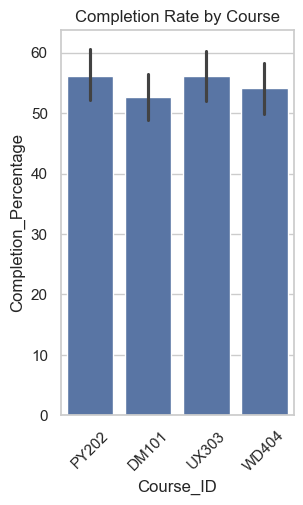

In [46]:
plt.figure(figsize=(3, 5))
sns.barplot(x='Course_ID', y='Completion_Percentage', data=data)
plt.title('Completion Rate by Course')
plt.xticks(rotation=45)
plt.show()


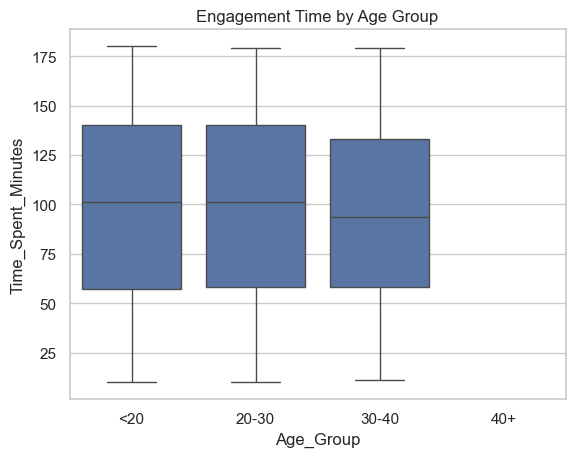

In [42]:
sns.boxplot(x='Age_Group', y='Time_Spent_Minutes', data=data)
plt.title('Engagement Time by Age Group')
plt.show()


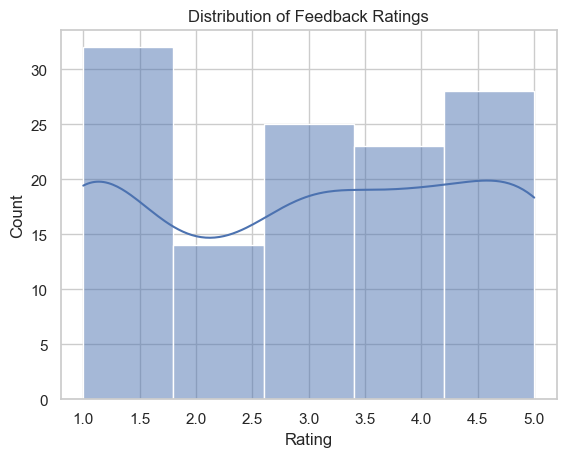

In [43]:
sns.histplot(data['Rating'].dropna(), bins=5, kde=True)
plt.title('Distribution of Feedback Ratings')
plt.show()


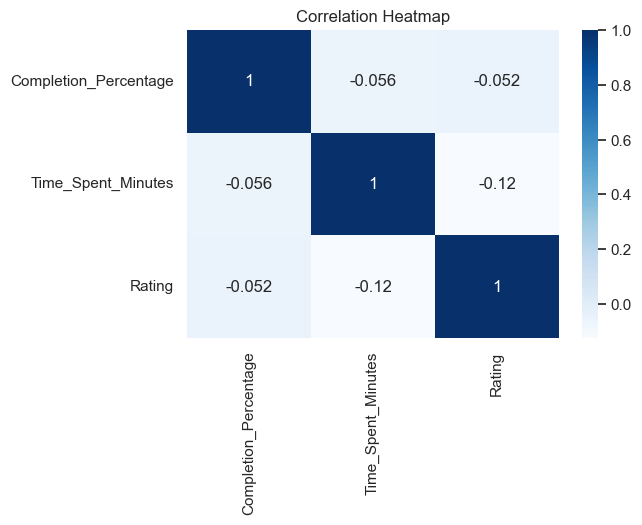

In [44]:
plt.figure(figsize=(6, 4))
sns.heatmap(data[['Completion_Percentage', 'Time_Spent_Minutes', 'Rating']].corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()


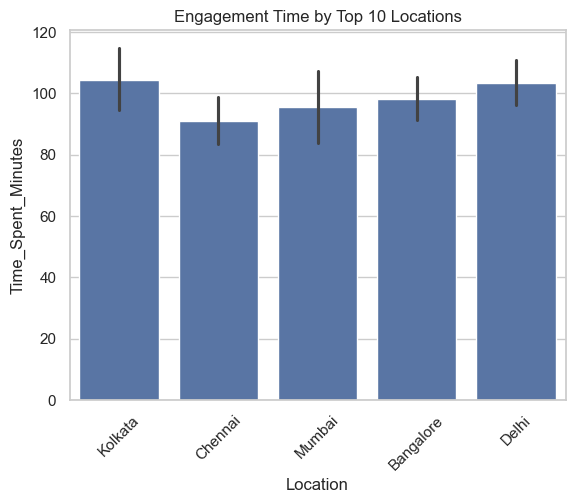

In [45]:
top_locations = data['Location'].value_counts().head(10).index
sns.barplot(x='Location', y='Time_Spent_Minutes', data=data[data['Location'].isin(top_locations)])
plt.title('Engagement Time by Top 10 Locations')
plt.xticks(rotation=45)
plt.show()
